## Deep Learning Series 10: Practice about Convolution Neural Network

In [1]:
%matplotlib inline
import matplotlib.image as mping # read picture
import matplotlib.pyplot as plt # show picture
import numpy as np
import keras

Using Theano backend.


In [4]:
cat = mping.imread('cat.PNG')

(-0.5, 464.5, 370.5, -0.5)

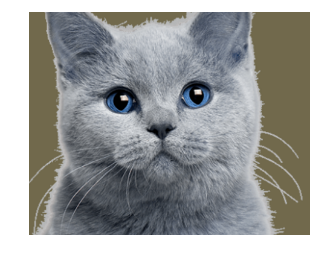

In [5]:
plt.imshow(cat) 
plt.axis('off') 

In [6]:
cat.shape

(371L, 465L, 4L)

#### Let's create a model with 1 convolutional layer 

- **3 filter and 3x3 kernel**

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Convolution2D(3, (3, 3), input_shape = cat.shape))      

In [11]:
cat_batch = np.expand_dims(cat, axis = 0)

In [12]:
cat_batch.shape

(1L, 371L, 465L, 4L)

(369L, 463L, 3L)


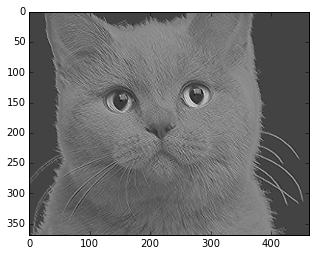

In [39]:
conv_cat = model.predict(cat_batch)   
conv_cat = np.squeeze(conv_cat, axis = 0)
print conv_cat.shape

plt.imshow(conv_cat[:, :, 2]);

- **3 filter and 20x20 kernel**

(352L, 446L, 3L)


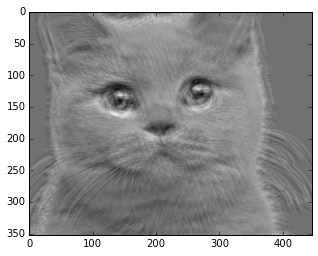

In [42]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Convolution2D(3, (20, 20), input_shape = cat.shape))  
conv2_cat = model2.predict(cat_batch)   

conv2_cat = np.squeeze(conv2_cat, axis = 0)
print conv2_cat.shape

plt.imshow(conv2_cat[:, :, 2]);

- **1 filter and 3x3 kernel**

(369L, 463L, 1L)


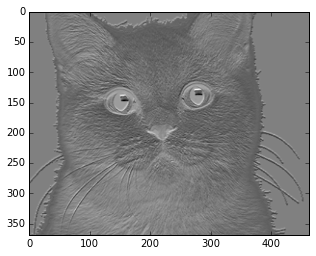

In [44]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Convolution2D(1, (3, 3), input_shape = cat.shape))  

conv3_cat = model3.predict(cat_batch)   
conv3_cat = np.squeeze(conv3_cat, axis = 0)
print conv3_cat.shape

plt.imshow(conv3_cat[:, :, 0]);

#### Let's create a model with 1 convolutional layer and 1 activation layer

(369L, 463L, 1L)


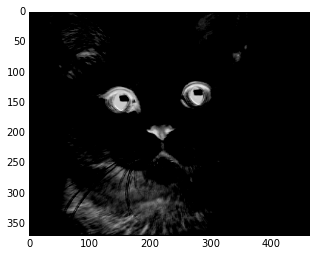

In [47]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Convolution2D(1, (3, 3), input_shape = cat.shape))  
# let us add a new activation layer
model4.add(keras.layers.Activation('relu'))

conv4_cat = model4.predict(cat_batch)   
conv4_cat = np.squeeze(conv4_cat, axis = 0)
print conv4_cat.shape

plt.imshow(conv4_cat[:, :, 0]);

#### Let's create a model with 1 convolutional layer and 1 MaxPooling layer

(184L, 231L, 1L)


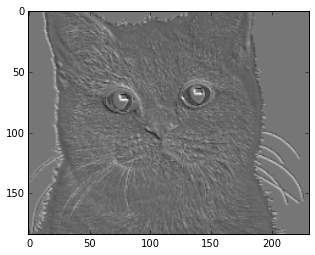

In [48]:
model5 = keras.models.Sequential()
model5.add(keras.layers.Convolution2D(1, (3, 3), input_shape = cat.shape))  
# let us add a new pooling layer
model5.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

conv5_cat = model5.predict(cat_batch)   
conv5_cat = np.squeeze(conv5_cat, axis = 0)
print conv5_cat.shape

plt.imshow(conv5_cat[:, :, 0]);

#### Let's create a model with 1 convolutional layer, 1 activation layer and 1 MaxPooling layer

(73L, 92L, 1L)


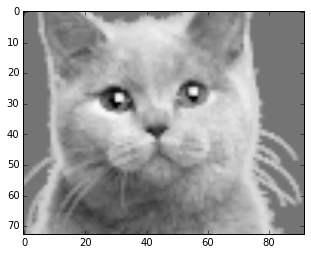

In [84]:
model6 = keras.models.Sequential()
model6.add(keras.layers.Convolution2D(1, (3, 3), input_shape = cat.shape))  
# let us activate then pool
model6.add(keras.layers.Activation('relu'))
model6.add(keras.layers.MaxPooling2D(pool_size = (5, 5)))

conv6_cat = model6.predict(cat_batch)   
conv6_cat = np.squeeze(conv6_cat, axis = 0)
print conv6_cat.shape

plt.imshow(conv6_cat[:, :, 0]);

(91L, 114L, 1L)


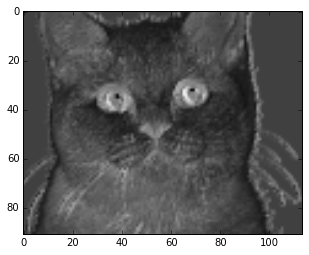

In [79]:
model7 = keras.models.Sequential()
model7.add(keras.layers.Convolution2D(1, (3, 3), input_shape = cat.shape))  
model7.add(keras.layers.Activation('relu'))
model7.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
model7.add(keras.layers.Convolution2D(1, (3, 3), input_shape = cat.shape))  
model7.add(keras.layers.Activation('relu'))
model7.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
#model7.add(keras.layers.Activation('softmax'))

conv7_cat = model7.predict(cat_batch)   
conv7_cat = np.squeeze(conv7_cat, axis = 0)
print conv7_cat.shape

plt.imshow(conv7_cat[:, :, 0]);

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 369L, 463L, 3)     111       
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 371L, 465L, 4L),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 3,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_3',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}}]

In [53]:
model.get_weights()

[array([[[[-0.27446979,  0.07700902,  0.02573749],
          [-0.28500262, -0.19947186,  0.29003051],
          [ 0.24843076, -0.0875546 , -0.12646531],
          [-0.14940706,  0.15799001, -0.18963228]],
 
         [[ 0.28159222, -0.288001  , -0.2452555 ],
          [-0.21649987,  0.27068278, -0.06440429],
          [ 0.28127661,  0.30156597,  0.21423349],
          [-0.11665386, -0.17488357, -0.18335593]],
 
         [[-0.28104842,  0.25325331,  0.20110729],
          [-0.17242245,  0.14905065,  0.04660204],
          [-0.07071604, -0.16872497, -0.19115928],
          [ 0.29768941,  0.0707452 ,  0.29654965]]],
 
 
        [[[-0.1225023 ,  0.07583177,  0.16867855],
          [ 0.06559145, -0.25245264, -0.0754209 ],
          [ 0.29380313, -0.1713406 ,  0.10070536],
          [ 0.09980085,  0.15446848,  0.24003658]],
 
         [[ 0.03131446,  0.01991424, -0.07127987],
          [-0.02192077,  0.14008048,  0.20311388],
          [-0.16239242, -0.07354011,  0.02079505],
          [-0.12